<a href="https://colab.research.google.com/github/Nitin6523/Spam_detection/blob/main/spam_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/spam_data.csv')
df.sample(5)

,Category,Message
5516,ham,"Ya, i'm referin to mei's ex wat... No ah, wait..."
3152,ham,Yeah but which is worse for i
1198,ham,He also knows about lunch menu only da. . I know
5164,spam,Congrats 2 mobile 3G Videophones R yours. call...
4008,ham,I'm reaching home in 5 min.


##Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Category']=LabelEncoder().fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# checking for missing and duplicate values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum()

415

In [ ]:
# remove duplicate
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(5157, 2)

##EDA

In [ ]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

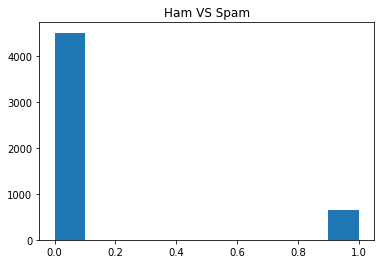

In [ ]:
plt.hist(df['Category'])
plt.title("Ham VS Spam")
plt.show()

Data is imbalnce

In [ ]:
spam=df[df['Category']==1]   # 1== SPAM
ham=df[df['Category']==0]    # 0== HAM

In [ ]:
print(ham.shape,spam.shape)

(4516, 2) (641, 2)


In [ ]:
x=df['Message']
y=df['Category']

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Number of characters
df['Characters count'] = df['Message'].apply(len)

In [ ]:
df.head()

,Category,Message,Characters count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Number of words
df['Word Count'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Category,Message,Characters count,Word Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Number of sentences
df['Sentences count'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Category,Message,Characters count,Word Count,Sentences count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# ham
df[df['Category'] == 0][['Characters count','Word Count','Sentences count']].describe()

,Characters count,Word Count,Sentences count
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['Category'] == 1][['Characters count','Word Count','Sentences count']].describe()

,Characters count,Word Count,Sentences count
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='Characters count', ylabel='Count'>

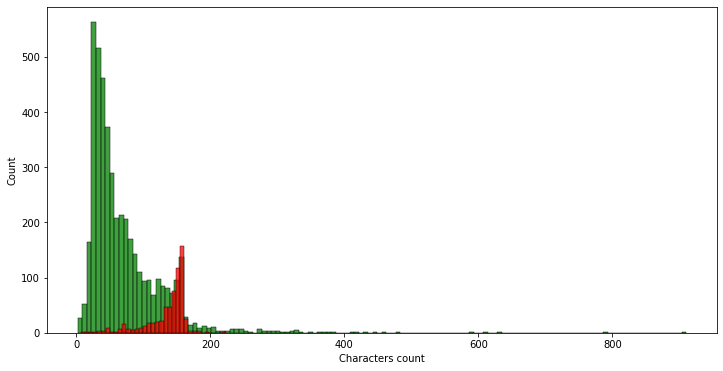

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['Characters count'],color='green')
sns.histplot(df[df['Category'] == 1]['Characters count'],color='red')

From above histogram be can obeserve that in general spam messages have **more** numbers of **characters** than ham messages

<Axes: xlabel='Word Count', ylabel='Count'>

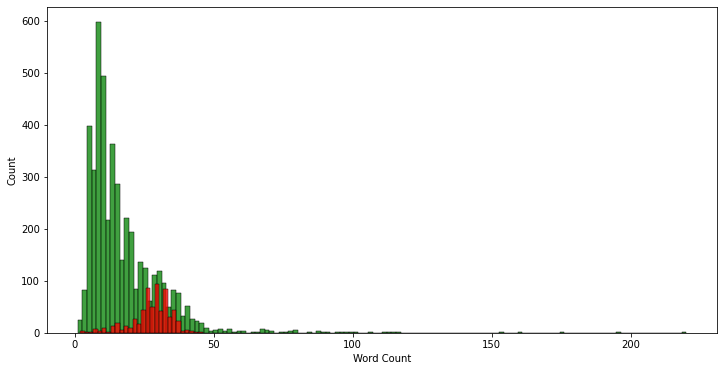

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['Word Count'],color='green')
sns.histplot(df[df['Category'] == 1]['Word Count'],color='red')

From above histogram be can obeserve that in general spam messages have **more** numbers of **words** than ham messages

<Axes: xlabel='Sentences count', ylabel='Count'>

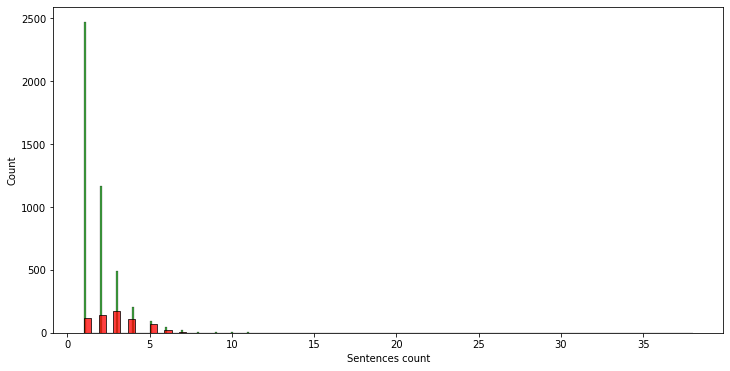

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['Sentences count'],color='green')
sns.histplot(df[df['Category'] == 1]['Sentences count'],color='red')

<Axes: >

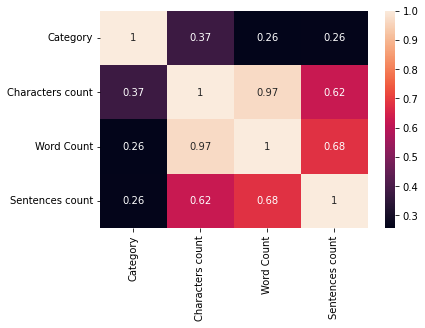

In [ ]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

In [ ]:
#for removing stop words
from nltk.corpus import stopwords
nltk.download('stopwords')

#for removing puncutions
import string

#for stemming
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
    # convert all to lower case
    text = text.lower()
    
    # tokenization
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
      # removing special charcters
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
      # removing stopwords and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
      # stemming
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
df["Message"][75]

'I am waiting machan. Call me once you free.'

In [ ]:
df['Category'][75]

0

In [ ]:
transform_text(df["Message"][2])

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [ ]:
# Creating a new coloumn for message after transformation
df['transformed_Message'] = df['Message'].apply(transform_text)

In [ ]:
df.head()

,Category,Message,Characters count,Word Count,Sentences count,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x= tfidf.fit_transform(df['transformed_Message']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(5157, 3000)

In [ ]:
y = df['Category'].values
y.shape

(5157,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
#  GaussianNB
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [ ]:
# MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [ ]:
#BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


Here  **MultinomialNB** gives better results

### Saving Model

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer_tf.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))